###
Úlohy
##
Jsou ženy diskriminované?


DecisionTree

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_dataset = pd.read_csv('C:/Users/LOLSCROL/Datasets/train_dataset.csv')

In [6]:
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,Yes,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,Yes,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,No,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,No,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,No,Yes,1,Western Region,Other,Other


In [7]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [8]:
train_dataset.isnull().sum()

wage             0
educ             0
exper            0
tenure           0
nonwhite         0
female           0
married          0
numdep           0
live_region      0
work_industry    0
occupation       0
dtype: int64

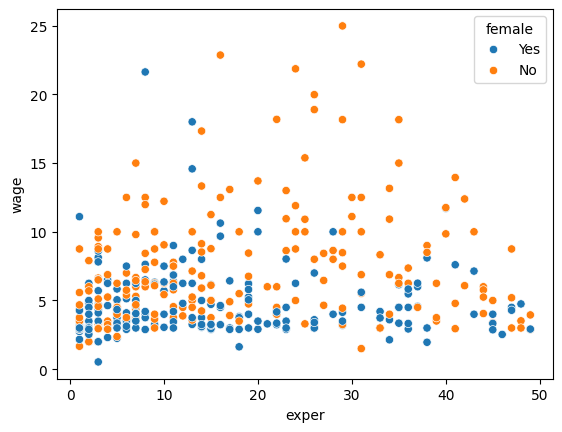

In [9]:
import matplotlib.pyplot as plt

sns.scatterplot(data=train_dataset, x='exper', y='wage', hue='female')

plt.show()

In [10]:
train_dataset['female'] = train_dataset['female'].map({'Yes': 1, 'No': 0})
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,1,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,1,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,0,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,0,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,0,Yes,1,Western Region,Other,Other


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_dt, y_dt = train_dataset[['educ', 'exper', 'female']], train_dataset['wage']
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_dt_train, y_dt_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [62]:
y_pred_dt = model.predict(X_dt_test)

In [63]:
train_dataset.columns

Index(['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married',
       'numdep', 'live_region', 'work_industry', 'occupation'],
      dtype='object')

In [64]:
# Přidání původního datasetu s genderem a platem do jednoho DataFrame pro graf
comparison_df = X_dt_test.copy()
comparison_df['Actual Salary'] = y_dt_test
comparison_df['Predicted Salary'] = model.predict(X_dt_test)

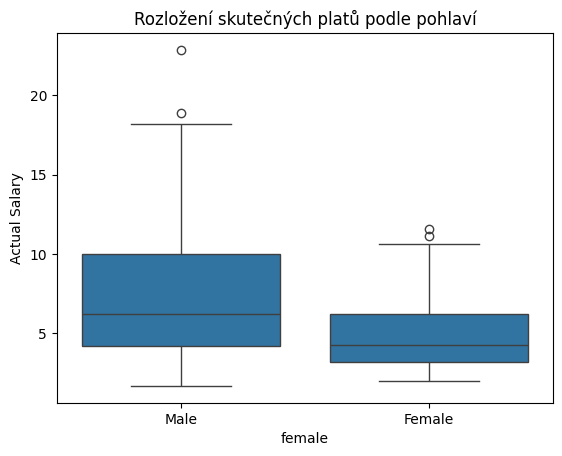

In [65]:
# Box plot skutečných platů podle pohlaví
import matplotlib.pyplot as plt

sns.boxplot(x='female', y='Actual Salary', data=comparison_df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Rozložení skutečných platů podle pohlaví")
plt.show()

In [66]:
import pandas as pd

x_test_df = pd.read_csv('C:/Users/LOLSCROL/Datasets/x_test.csv')

In [67]:
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,No,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,No,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,No,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,Yes,Yes,0,Other,Other,Other
4,14,33,3,No,Yes,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [68]:
x_test_df['female'] = x_test_df['female'].map({'Yes': 1, 'No': 0})
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,0,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,0,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,0,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,1,Yes,0,Other,Other,Other
4,14,33,3,No,1,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [69]:
X_dt, y_dt = x_test_df[['educ', 'exper', 'female']], train_dataset['wage']

In [70]:
x_test_df.shape, train_dataset.shape

((105, 10), (421, 11))

In [71]:
y_pred_dec_tree = model.predict(X_dt)

In [72]:
y_pred_dec_tree

array([ 4.70367349,  6.49456526,  4.70367349,  3.37468754,  4.99490196,
        8.02000046,  3.37468754,  6.49456526, 10.26050001, 13.08818167,
        6.49456526, 13.08818167,  4.29945205,  6.49456526,  4.99490196,
       10.26050001,  6.49456526,  4.29945205,  6.49456526, 24.97999954,
        4.29945205,  4.99490196, 13.08818167, 10.26050001,  4.29945205,
       10.26050001,  6.49456526,  4.29945205,  4.70367349,  4.29945205,
        4.29945205,  4.29945205,  4.29945205, 10.26050001,  3.37468754,
       10.26050001, 10.26050001,  4.99490196,  6.49456526,  4.29945205,
        4.29945205,  3.37468754,  4.29945205,  5.30307695,  4.70367349,
        4.99490196,  6.49456526,  6.49456526,  5.30307695,  5.30307695,
        6.49456526,  4.29945205,  3.37468754,  4.29945205, 10.26050001,
        6.49456526,  6.49456526, 10.26050001,  4.29945205,  4.70367349,
        6.49456526,  6.49456526,  6.49456526,  4.29945205,  6.49456526,
        5.30307695,  3.37468754,  4.70367349,  4.29945205,  6.49

Polynomial features

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
#train_dataset['female'] = train_dataset['female'].map({'Yes': 1, 'No': 0})
train_dataset.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,3.10,11,2,0,No,Yes,No,2,SMSA,Other,Other
1,3.24,12,22,2,No,Yes,Yes,3,SMSA,Services Industry,Service Occupation
2,3.00,11,2,0,No,No,No,2,Western Region,Wholesale or Retail,Other
3,6.00,8,44,28,No,No,Yes,0,SMSA,Other,Clerical Occupation
4,5.30,12,7,2,No,No,Yes,1,Western Region,Other,Other


In [73]:
X_p = train_dataset[['exper', 'female']]
y_poly = train_dataset['wage']

In [74]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_p)

In [75]:
poly.get_feature_names_out()

array(['1', 'exper', 'female', 'exper^2', 'exper female', 'female^2'],
      dtype=object)

In [76]:
import pandas as pd

pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

,1,exper,female,exper^2,exper female,female^2
0,1.0,2.0,1.0,4.0,2.0,1.0
1,1.0,22.0,1.0,484.0,22.0,1.0
2,1.0,2.0,0.0,4.0,0.0,0.0
3,1.0,44.0,0.0,1936.0,0.0,0.0
4,1.0,7.0,0.0,49.0,0.0,0.0
...,...,...,...,...,...,...
416,1.0,39.0,0.0,1521.0,0.0,0.0
417,1.0,5.0,1.0,25.0,5.0,1.0
418,1.0,14.0,1.0,196.0,14.0,1.0
419,1.0,8.0,0.0,64.0,0.0,0.0


In [77]:
model = LinearRegression()

model.fit(X_poly, y_poly)

LinearRegression()

In [81]:
y_train_poly_pred = model.predict(X_poly)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MSE = mean_squared_error(y_poly, y_train_poly_pred)
MAE = mean_absolute_error(y_poly, y_train_poly_pred)
R2 = r2_score(y_poly, y_train_poly_pred)

In [83]:
print(f'MSE: {MSE}')
print(f'MAE: {MAE}')
print(f'R2: {R2}')

MSE: 10.858778942417606
MAE: 2.3459789341193638
R2: 0.20876685035254694


In [84]:
x_test_df.head()

,educ,exper,tenure,nonwhite,female,married,numdep,live_region,work_industry,occupation
0,16,2,2,No,0,Yes,0,SMSA,Wholesale or Retail,Service Occupation
1,14,9,3,No,0,Yes,1,SMSA,Nondur. Manufacturing Industry,Professional Occupation
2,11,1,0,No,0,No,0,Other,Wholesale or Retail,Service Occupation
3,8,45,1,No,1,Yes,0,Other,Other,Other
4,14,33,3,No,1,Yes,0,SMSA,Professional Services Industry,Service Occupation


In [85]:
X_test = x_test_df[['exper', 'female']]
X_test_poly = poly.transform(X_test)

In [90]:
y_pred_poly = model.predict(X_test_poly)

In [ ]:
pd.DataFrame(y_pred_poly).to_csv('y_pred_poly.csv', index=False)


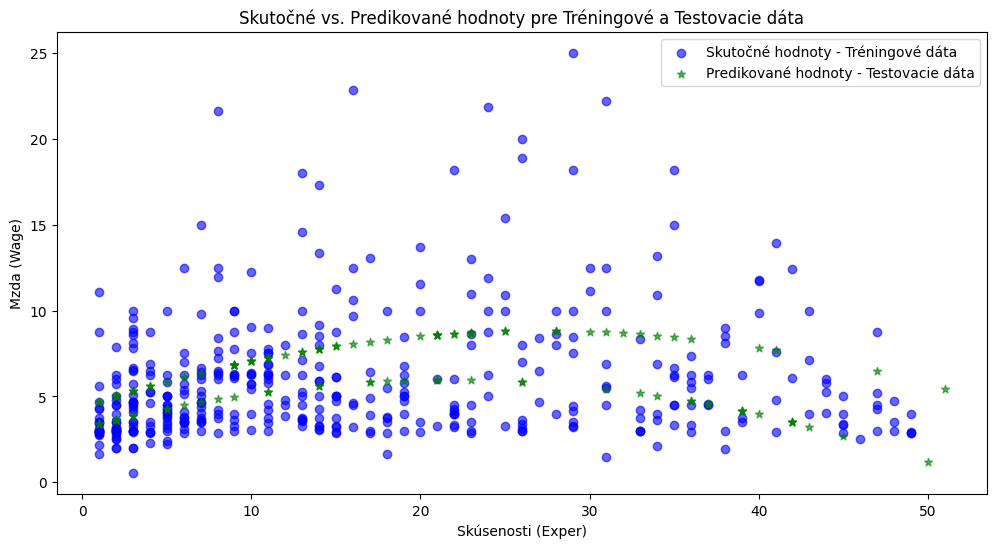

In [96]:
import matplotlib.pyplot as plt


# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 6))

# Tréningové dáta: Skutočné vs. Predikované hodnoty
plt.scatter(X_p['exper'], y_poly, color='blue', label='Skutočné hodnoty - Tréningové dáta', alpha=0.6)

# Testovacie dáta: Predikované hodnoty
plt.scatter(X_test['exper'], y_pred_poly, color='green', label='Predikované hodnoty - Testovacie dáta', marker='*', alpha=0.6)

# Popisky a legenda
plt.xlabel("Skúsenosti (Exper)")
plt.ylabel("Mzda (Wage)")
plt.title("Skutočné vs. Predikované hodnoty pre Tréningové a Testovacie dáta")
plt.legend()

# Zobrazenie grafu
plt.show()

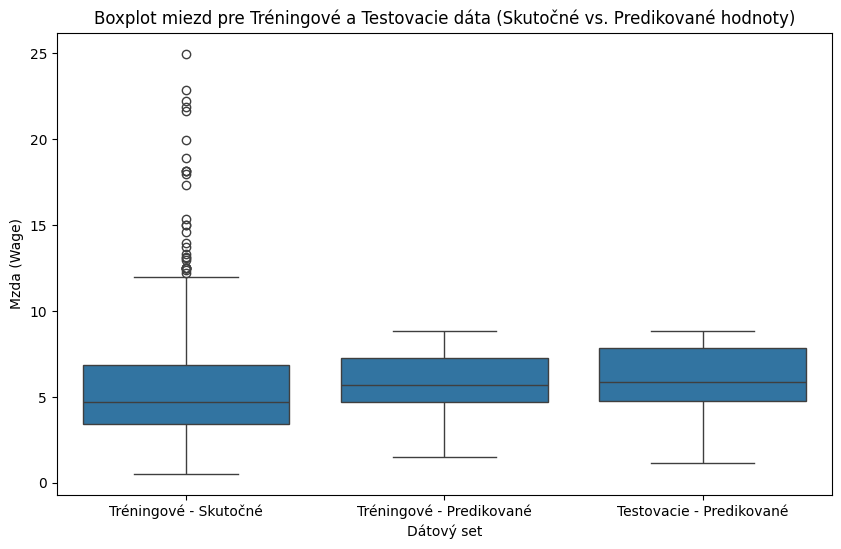

In [103]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns


# Vytvorenie dátového rámca s príznakmi pre každú skupinu
data = pd.DataFrame({
    'Hodnota': list(y_poly) + list(y_train_poly_pred) + list(y_pred_poly),
    'Typ': (["Tréningové - Skutočné"] * len(y_poly))
    + (["Tréningové - Predikované"] * len(y_train_poly_pred))
    + (["Testovacie - Predikované"] * len(y_pred_poly)),
})


# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typ', y='Hodnota', data=data)
plt.xlabel("Dátový set")
plt.ylabel("Mzda (Wage)")
plt.title("Boxplot miezd pre Tréningové a Testovacie dáta (Skutočné vs. Predikované hodnoty)")
plt.show()